In [31]:
#NAME: Dispersion
#DESCRIPTION: ...

import numpy as np
import pycav.optics as opt
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [53]:
def oneD_gaussian(x,mean,std):
    return np.exp(-((x-mean)**2)/(2*std**2))

def f(x,y,t):
    f_val  = -0.1*oneD_gaussian(x,0.5,0.2)*oneD_gaussian(y,0.5,0.2)
    return f_val
    
def dfdx(x,y,t):
    df = 0.1*(x-0.5)*oneD_gaussian(x,0.5,0.2)*oneD_gaussian(y,0.5,0.2)/0.2**2
    return df
    
def dfdy(x,y,t):
    df = 0.1*(y-0.5)*oneD_gaussian(x,0.5,0.2)*oneD_gaussian(y,0.5,0.2)/0.2**2
    return df

N_x = 100
N_y = 100

# Refractive indices for 3 colours
n_arr = [[1.,1.8],[1.,2.6],[1.,3.4]]
h = 2.

boxsize_x = 0.02
boxsize_y = 0.02

X_c = []
Y_c = []
I_c = []

for i in range(3):
    x,y,rays = opt.ray_grid(N_x,N_y,n_arr[i],h,f,dfdx,dfdy)
    rays_x,rays_y,X,Y,I = opt.single_time_image(rays,boxsize_x,boxsize_y)
    X_c.append(X)
    Y_c.append(Y)
    I_c.append(I)

<IPython.core.display.Javascript object>


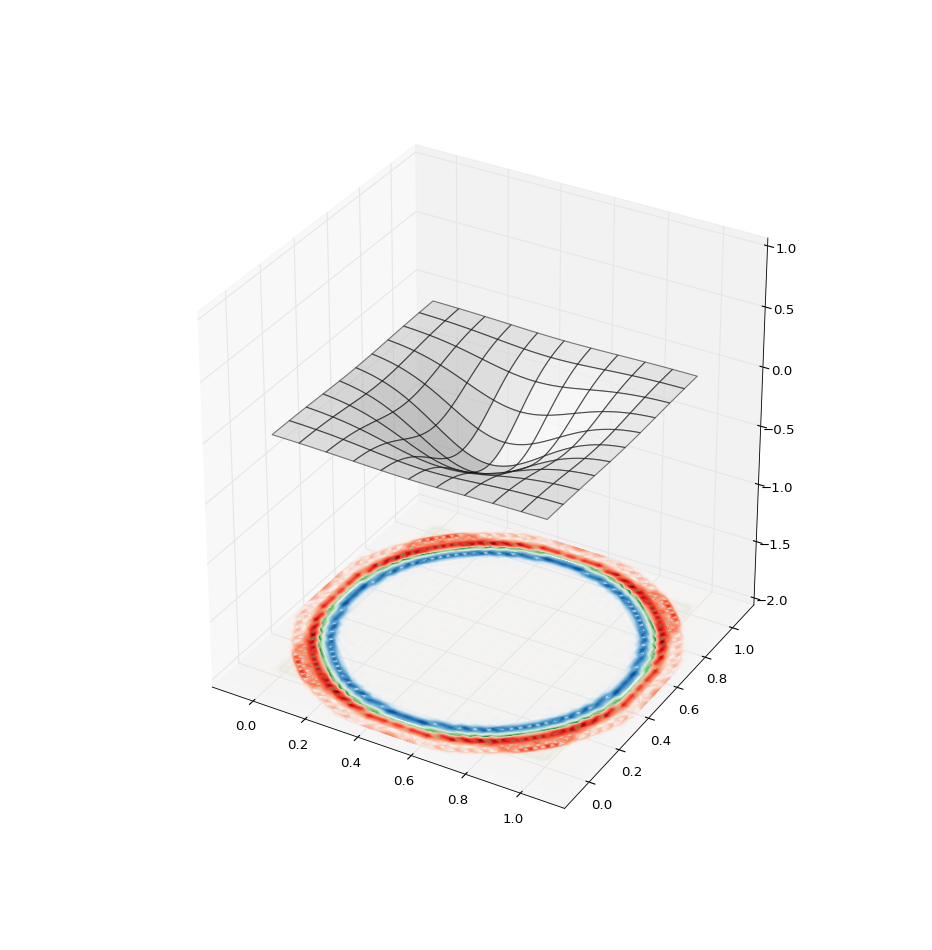

In [54]:
def colormaps():
    blue = cm.get_cmap('Blues')
    blue._init()
    alphas = np.linspace(0.0, 1.0, blue.N)
    blue._lut[:-3,-1] = alphas    

    green = cm.get_cmap('Greens')
    green._init()
    alphas = np.linspace(0.0, 1.0, green.N)
    green._lut[:-3,-1] = alphas   
    
    red = cm.get_cmap('Reds')
    red._init()
    alphas = np.linspace(0.0, 1.0, red.N)
    red._lut[:-3,-1] = alphas 
    
    return blue,green,red

fig = plt.figure(figsize = (9,9))
ax = fig.gca(projection='3d')
    
X,Y = np.meshgrid(x,y)
    
surface = np.zeros_like(X)
max_I = max([I.max() for I in I_c])
    
surface = opt.surface_calc(surface,x,y,0.,[N_x,N_y],h,f,0.1,0.25)
            
ax.plot_surface(X,Y,surface, color = 'w', alpha = 0.5)

blue,green,red = colormaps()

c_map = {0 : blue, 1 : green, 2 : red}

for i in range(3):
    ax.contourf(X_c[i], Y_c[i], I_c[i], 100, zdir='z', offset=-h,
                cmap=c_map[i],vmin=0., vmax=max_I)

ax.set_zlim(-h,0.5*h);


In [55]:
plt.savefig('dispersion.png')